# Elementary Numerical Partial Differential Equations\\

## Homework 1\\

* Derive a finite difference approximation of $u'(x)$ using
$u(x-h)$, $u(x)$, $u(x+h)$ and $u(x+2h)$.

* Consider the boundary value problem (BVP)

\begin{align*}
 u''(x) &= f(x), \quad -1 < x < 1,\\
u(-1)&=\alpha,\\
u(1)&=\beta.\\
\end{align*}


Implement (2.10) to write a program to solve the BVP with various
grid sizes and boundary conditions as follows


- $f(x)=12x^2-4,\quad \alpha=\beta=0.$

Discuss the results.

In [1]:
from scipy.integrate import odeint
from scipy.linalg import solve
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def f(x):
    f = 12*x**2-4
    return f
def u(x):
    u = x**4-2*x**2+1
    return u

In [3]:
a = -1.0
b = 1.0
a1 = 0
b1 = 0
x = np.linspace(a,b)  # x-axis

In [4]:
def sol(m):
    h = (b-a)/(m+1)
    
# {create matrix A 
    A1 = np.zeros([m])
    A1[0:0+2] = [-2,1]
    for i in range(1,m-1):
        A2 = np.zeros([m])
        A2[i-1:i-1+3] = [1,-2,1]
        A1 = np.vstack([A1,A2])
    A3 = np.zeros([m])
    A3[m-2:m-2+2] = [1,-2]
    A = np.vstack([A1,A3])
# }end create

# {create F
    F = np.zeros([m])
    for i in range(m):
        j = i+1
        if i==0:
            F[i] = f(-1+j*h)*h**2 - a1
        elif i==m-1:
            F[i] = f(-1+j*h)*h**2 - b1
        else:
            F[i] = f(-1+j*h)*h**2
# }end create

    S = solve(A,np.transpose(F))
    x_nd = np.linspace(a,b,m+2)  # approximate nodes
    
# {create y
    temp = np.zeros([m+2])
    temp[1:1+m] = S
    temp[0] = a1
    temp[m+1] = b1
    y = temp
# }end create
    
    err = abs( u(x_nd) - y )
    m_norm = max(err)
    
    return x_nd, y, m_norm

In [5]:
norm = np.zeros([5])
H = np.zeros([5])

In [6]:
x_nd = sol(9)[0]
y = sol(9)[1]
norm[0] = sol(9)[2]
H[0] = (b-a)/(9+1)
print 'For h = %.5f' %H[0], '  ,  max_norm is %e' %norm[0]

For h = 0.20000   ,  max_norm is 4.000000e-02


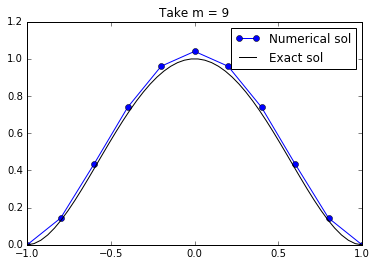

In [7]:
plt.plot(x_nd,y,'bo-',label="Numerical sol")
plt.plot(x,u(x),'k-',label="Exact sol")
plt.title("Take m = 9")
plt.legend()
plt.show()

In [8]:
M = [99,499,699,999]
i = 1
for j in M:
    x_nd = sol(j)[0]
    y = sol(j)[1]
    norm[i] = sol(j)[2]
    H[i] = (b-a)/(j+1)
    print 'For h = %.5f' %H[i], '  ,  max_norm is %e' %norm[i]
    i = i+1

For h = 0.02000   ,  max_norm is 4.000000e-04
For h = 0.00400   ,  max_norm is 1.600000e-05
For h = 0.00286   ,  max_norm is 8.163265e-06
For h = 0.00200   ,  max_norm is 4.000000e-06


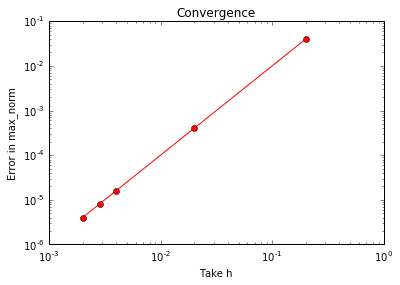

In [9]:
plt.loglog(H,norm,'ro-')
plt.xlabel("Take h")
plt.ylabel("Error in max_norm")
plt.title("Convergence")
plt.show()

In [10]:
data = np.vstack([np.log(H), np.ones(len(H))]).T
p, q = np.linalg.lstsq(data, np.log(norm))[0]
print 'ln(err) = %.5f' %p, '*ln(h) + %e' %q
print
print '        ( err = c*h^p  =>  ln(err) = p*ln(h) + ln(c) )'

ln(err) = 2.00000 *ln(h) + 3.364564e-08

        ( err = c*h^p  =>  ln(err) = p*ln(h) + ln(c) )


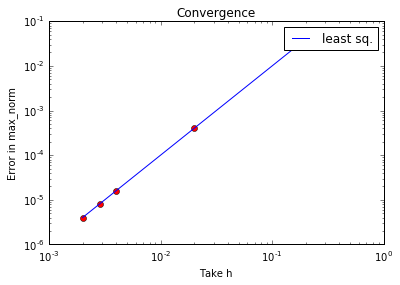

In [11]:
plt.loglog(H,norm,'ro')
plt.loglog(H,np.exp(q)*H**p,'b',label="least sq.")
# err = c*h^p => ln(err) = p*ln(h)+ln(c), where ln(c) = q
plt.xlabel("Take h")
plt.ylabel("Error in max_norm")
plt.title("Convergence")
plt.legend()
plt.show()